# Lending Club Case Study - Exploratory Data Analysis

## Group members: Mahitha Anumukonda & Mridul Ahluwalia

### Business Objective: 

<font color=blue>To identify at least __FIVE__ driving factors behind loan default.<font>

### Assumptions:

<font color=blue>
1. Only those variables be chosen for analysis that will be available to the investor at the time of deciding whether to invest in a loan request or not.
<br>
2. We are consudering only charged off & fully paid off data.Hence we are dropping the data whose loan_status is 'current'.<font>

### Importing all the required libraries for the analysis.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
sns.set(style='whitegrid')

Reading the loan.csv data file.

In [2]:
file_path="C:\\Users\\HARITHA\\Desktop\\Lending club case study\\"

In [3]:
loan_data=pd.read_csv(file_path+'loan.csv',encoding = "ISO-8859-1",engine='python')
print(loan_data.shape)

(39717, 111)


In [4]:
loan_data.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
count,3.971700e+04,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,3.971700e+04,39717.000000,39717.000000,39717.000000,...,0.0,0.0,0.0,0.0,39020.000000,39678.0,0.0,0.0,0.0,0.0
mean,6.831319e+05,8.504636e+05,11219.443815,10947.713196,10397.448868,324.561922,6.896893e+04,13.315130,0.146512,0.869200,...,NaN,NaN,NaN,NaN,0.043260,0.0,NaN,NaN,NaN,NaN
std,2.106941e+05,2.656783e+05,7456.670694,7187.238670,7128.450439,208.874874,6.379377e+04,6.678594,0.491812,1.070219,...,NaN,NaN,NaN,NaN,0.204324,0.0,NaN,NaN,NaN,NaN
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
25%,5.162210e+05,6.667800e+05,5500.000000,5400.000000,5000.000000,167.020000,4.040400e+04,8.170000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
50%,6.656650e+05,8.508120e+05,10000.000000,9600.000000,8975.000000,280.220000,5.900000e+04,13.400000,0.000000,1.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
75%,8.377550e+05,1.047339e+06,15000.000000,15000.000000,14400.000000,430.780000,8.230000e+04,18.600000,0.000000,1.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
max,1.077501e+06,1.314167e+06,35000.000000,35000.000000,35000.000000,1305.190000,6.000000e+06,29.990000,11.000000,8.000000,...,NaN,NaN,NaN,NaN,2.000000,0.0,NaN,NaN,NaN,NaN


## Data Understanding and Cleaning

#### Variables:
funded_amnt - loan amount is considered hence this was considered redundant.
<br>
funded_amnt_inv - loan amount is considered hence this was considered redundant
<br>
id,member_id,url - They are not useful for our analysis.
<br>
desc - It is an equivalent short and consise information and is present in the purpose and title column of the data.

<font color=red>__Assumption:__ As there is a high correlation between loan_amnt, funded_amnt and funded_amnt_inv, installments we are choosing to perform our analysis only on loan amount as it will give us a good approximation for rest</font>

In [5]:
#drop columns which are irrelevant/unnecessary:
columns_to_drop = ["id","member_id","url","desc","funded_amnt","funded_amnt_inv"]
loan_data.drop(columns_to_drop, axis=1, inplace=True)
loan_data.shape

(39717, 105)

In [6]:
#check for null values count in each column:
Null_col_count=len(loan_data.columns[loan_data.count() == 0])
print("No.of columns with data: ")
print(Null_col_count)
loan_data.isna().sum()

No.of columns with data: 
54


loan_amnt                         0
term                              0
int_rate                          0
installment                       0
grade                             0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 105, dtype: int64

In [7]:
#remove the columns which have null values for all records, as they are of no use for our analysis.
loan_data = loan_data[loan_data.columns[loan_data.count() != 0]]

In [8]:
loan_data.shape

(39717, 51)

<font color=green>After removing such columns. 51 columns remain.
Let us examine further for missing values.</font>

In [9]:
# percentage of missing values in each column
missing_values=round(loan_data.isnull().sum()/len(loan_data.index), 2)*100
missing_values[missing_values != 0]

emp_title                  6.0
emp_length                 3.0
mths_since_last_delinq    65.0
mths_since_last_record    93.0
next_pymnt_d              97.0
pub_rec_bankruptcies       2.0
dtype: float64

In [10]:
#Lets remove all the columns with more than 50% missing values.
columns_with_missing_values = list(missing_values[missing_values >= 50].index)
len(columns_with_missing_values)
loan_data=loan_data.drop(columns_with_missing_values,axis=1)
loan_data.shape

(39717, 48)

In [11]:
print("unique emp_title : %d"  % len(loan_data.emp_title.unique()))
print("unique emp_length : %d"  % len(loan_data.emp_length.unique()))
print("unique title : %d"  % len(loan_data.title.unique()))
print("unique revol_util : %d"  % len(loan_data.revol_util.unique()))
print("unique last_pymnt_d : %d"  % len(loan_data.last_pymnt_d.unique()))
print("unique last_credit_pull_d : %d"  % len(loan_data.last_credit_pull_d.unique()))
print("unique collections_12_mths_ex_med : %d"  % len(loan_data.collections_12_mths_ex_med.unique()))
print("unique chargeoff_within_12_mths : %d"  % len(loan_data.chargeoff_within_12_mths.unique()))
print("unique pub_rec_bankruptcies : %d"  % len(loan_data.pub_rec_bankruptcies.unique()))
print("unique tax_liens : %d"  % len(loan_data.tax_liens.unique()))

unique emp_title : 28821
unique emp_length : 12
unique title : 19616
unique revol_util : 1090
unique last_pymnt_d : 102
unique last_credit_pull_d : 107
unique collections_12_mths_ex_med : 2
unique chargeoff_within_12_mths : 2
unique pub_rec_bankruptcies : 4
unique tax_liens : 2


<font color=green>The column emp_title is having nearly 30000 unique values.Hence this column cannot be used for analysis.</font>

<font color=green>Columns emp_length, collections_12_mths_ex_med, chargeoff_within_12_mths, pub_rec_bankruptcies and tax_liens are clearly Categorical with values belonging to a range.</font>

<font color=blue>Let's take a look at all the different values of these Categorical columns<font>

In [12]:
loan_data.emp_length.unique()

array(['10+ years', '< 1 year', '1 year', '3 years', '8 years', '9 years',
       '4 years', '5 years', '6 years', '2 years', '7 years', nan],
      dtype=object)

In [13]:
loan_data.collections_12_mths_ex_med.unique()

array([ 0., nan])

In [14]:
loan_data.chargeoff_within_12_mths.unique()

array([ 0., nan])

In [15]:
loan_data.pub_rec_bankruptcies.unique()

array([ 0.,  1.,  2., nan])

In [16]:
loan_data.tax_liens.unique()

array([ 0., nan])

<font color=green>The columns collections_12_mths_ex_med, chargeoff_within_12_mths and tax_liens has either value of 0 or NaN(no entry/blank). The range of values that these categorical columns can take is not of any significant impact to the analysis.</font><br>
<font color=blue>We can drop these columns.</font>

In [17]:
drop_columnlist = ['collections_12_mths_ex_med', 'chargeoff_within_12_mths','tax_liens','emp_title','title']
loan_data = loan_data.drop(drop_columnlist,axis=1)

In [18]:
loan_data.shape

(39717, 43)

In [19]:
missing_values = round(100*(loan_data.isnull().sum()/len(loan_data.index)), 2) 
missing_values[missing_values != 0]

emp_length              2.71
revol_util              0.13
last_pymnt_d            0.18
last_credit_pull_d      0.01
pub_rec_bankruptcies    1.75
dtype: float64

<font color=green>Next, the column emp_length have 2.71% & revol_util  is having 0.13% missing value. These column have information about employment length in years.</font> 
<br>
<font color=blue>Let's remove the rows with nan/blank values for this varaible.</font>

In [20]:
loan_data=loan_data[~loan_data.emp_length.isnull()]
loan_data=loan_data[~loan_data.revol_util.isnull()]

<font color=green>Now, we are left with 3 columns pub_rec_bankruptcies, last_credit_pull_d and last_pymnt_d which account for a very small % of missing values.
pub_rec_bankruptcies gives the Number of public record bankruptcies.
last_pymnt_d gives the month in which last payment was received.
<br>
pub_rec_bankruptcies can be seen to have taking values like [0,1,2]. Almost 35000 records with 0 record of bankrupcies, 1500 records having one bankrupcies case and 7 records with two bankrupcies case.</font>

<font color=blue>Let's again remove the rows with null value for these variables.</font>

In [21]:
loan_data=loan_data[~loan_data.last_pymnt_d.isnull()]
loan_data=loan_data[~loan_data.last_credit_pull_d.isnull()]
loan_data=loan_data[~loan_data.pub_rec_bankruptcies.isnull()]
loan_data.shape

(37835, 43)

In [22]:
missing_values = round(100*(loan_data.isnull().sum()/len(loan_data.index)), 2) 
missing_values[missing_values != 0]

Series([], dtype: float64)

<font color=green>Next, there are few columns expressed in  % like int_rate and revol_util.
These has values like '15.27%' and '9.40%'.
Further these columns has dtype as 'object'.</font>
<br>
<font color=blue>Let's convert these columns to have just the value withoout '%' and typecast it to float.</font>

In [23]:
loan_data['int_rate'] = loan_data['int_rate'].str.strip('%').astype('float')
loan_data['revol_util'] = loan_data['revol_util'].str.strip('%').astype('float')

Let us now take a look at the emp_length column.

In [24]:
loan_data.emp_length.value_counts()

10+ years    8750
< 1 year     4397
2 years      4293
3 years      4023
4 years      3377
5 years      3235
1 year       3133
6 years      2193
7 years      1747
8 years      1449
9 years      1238
Name: emp_length, dtype: int64

<font color=green>According to the data_dictionary file description for this field,
emp_length: Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years.</font>
<br>
<font color=blue>Let's convert the column to have values between 0 and 10.</font>

In [25]:

emp_length_dict = {
    '< 1 year' : 0,
    '1 year' : 1,
    '2 years' : 2,
    '3 years' : 3,
    '4 years' : 4,
    '5 years' : 5,
    '6 years' : 6,
    '7 years' : 7,
    '8 years' : 8,
    '9 years' : 9,
    '10+ years' : 10
}

In [26]:
loan_data=loan_data.replace({"emp_length": emp_length_dict })

In [27]:
loan_data.emp_length.value_counts()

10    8750
0     4397
2     4293
3     4023
4     3377
5     3235
1     3133
6     2193
7     1747
8     1449
9     1238
Name: emp_length, dtype: int64

<font color=green>The column term: The number of payments on the loan. Values are in months and can be either 36 or 60.
removing the months string from within the column term.</font>

In [28]:
loan_data.term.value_counts()

 36 months    27498
 60 months    10337
Name: term, dtype: int64

In [29]:
loan_data['term']=loan_data.term.apply(lambda x: x.split()[0])
loan_data.term.value_counts()

36    27498
60    10337
Name: term, dtype: int64

In [30]:
####plot bxplots for some quantitative variables and check for outliers

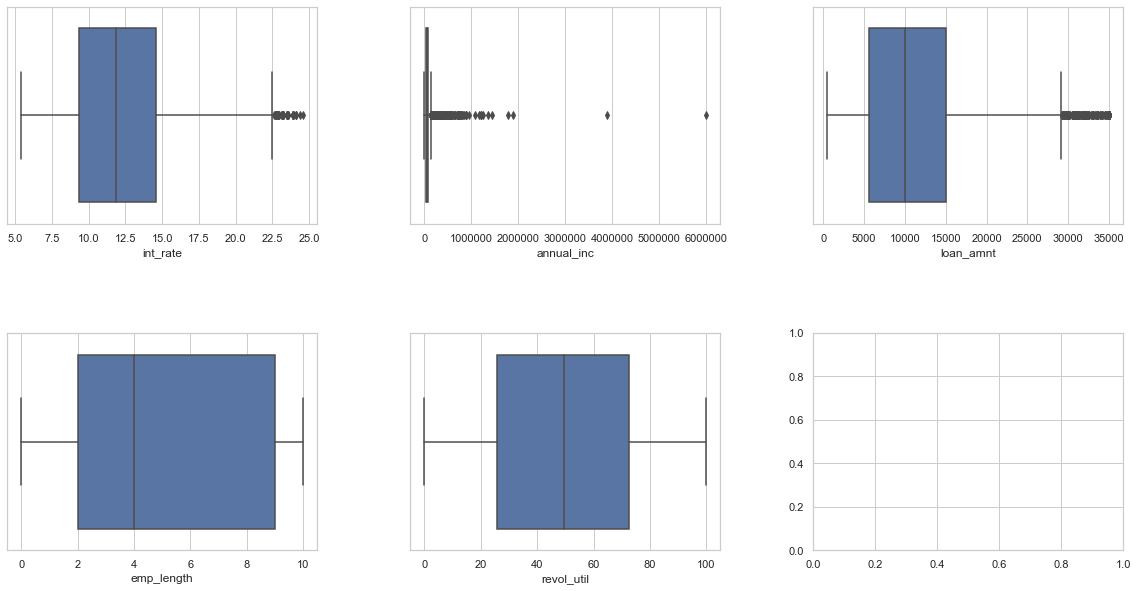

In [31]:
# Checking for Outliers in quantitative variables

fig, ax = plt.subplots(2, 3, figsize=(20,10))
plt.subplots_adjust(hspace=0.5, wspace=0.3)

fig1 = sns.boxplot(loan_data.int_rate, ax=ax[0][0])

fig2 = sns.boxplot(loan_data.annual_inc, ax=ax[0][1])

fig3 = sns.boxplot(loan_data.loan_amnt, ax=ax[0][2])

fig4 = sns.boxplot(loan_data.emp_length, ax=ax[1][0])

fig5 = sns.boxplot(loan_data.revol_util, ax=ax[1][1])


pass

<font color=blue>
Outliers are being removed for annual_inc becasue we observed that these outliers were creating distortion in our data analysis
</font>

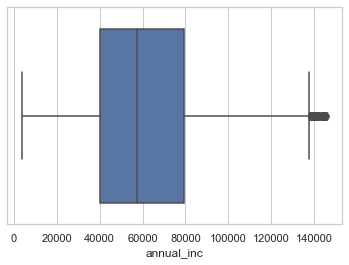

In [32]:
# Removing outliers
Q1 = loan_data.annual_inc.quantile(0.25)
Q3 = loan_data.annual_inc.quantile(0.75)
IQR = Q3-Q1
loan_data = loan_data[~((loan_data.annual_inc<(Q1-1.5*IQR))|(loan_data.annual_inc>(Q3+1.5*IQR)))]
fig1 = sns.boxplot(loan_data.annual_inc)
pass

### Type Driven Metrics -  earliest_cr_line & issue_d

<font color=blue>Converting the dtype of earliest_cr_line & issue_d column to datetime and extract the year which is used for analysis.</font>

In [33]:
loan_data.earliest_cr_line = pd.to_datetime(loan_data.earliest_cr_line, format='%b-%y')

<font color=green>earliest_cr_line: The date the borrower's earliest reported credit line was opened.</font>
<br>
<font color=blue>Let's extract the year into earliest_cr_line_year column.</font>

In [34]:
loan_data['earliest_cr_line_year']=loan_data['earliest_cr_line'].dt.year

In [35]:
len(loan_data[loan_data['earliest_cr_line_year'] > 2011 ])

51

<font color=green>We see that there are 50 records with the earliest credit line date greater than 2011(which is the max range of the data we have).
Lets see the data to understand why.</font>

In [36]:
loan_data[loan_data['earliest_cr_line_year'] > 2011 ]['earliest_cr_line_year'].unique()

array([2068, 2067, 2063, 2065, 2062, 2066, 2056, 2046, 2050, 2064, 2054],
      dtype=int64)

<font color=green>This seems to be a result of y2k like error. Year stored in two digits being interpreted as year in 21st century. Let's fix the entries.</font>

In [37]:
loan_data.loc[loan_data['earliest_cr_line_year'] > 2011 , 'earliest_cr_line_year']=loan_data['earliest_cr_line_year'] - 100

In [38]:
loan_data.groupby('earliest_cr_line_year').loan_amnt.count()

earliest_cr_line_year
1946       1
1950       1
1954       1
1956       1
1962       3
1963       4
1964       2
1965       5
1966       6
1967      14
1968      13
1969      24
1970      37
1971      33
1972      33
1973      40
1974      50
1975      58
1976      71
1977      86
1978     127
1979     125
1980     150
1981     144
1982     185
1983     284
1984     327
1985     383
1986     445
1987     529
1988     635
1989     742
1990     882
1991     835
1992     933
1993    1338
1994    1797
1995    1920
1996    2068
1997    2257
1998    2630
1999    2770
2000    3027
2001    2385
2002    1818
2003    1767
2004    1679
2005    1438
2006    1116
2007     683
2008     147
Name: loan_amnt, dtype: int64

<font color=blue>issue_d: The date which the loan was funded .
Converting the data type to datetime and extract the year available date into issued_year column.</font>

In [39]:
loan_data['issue_d'] = pd.to_datetime(loan_data.issue_d.str.upper(), format='%b-%y', yearfirst=False)
loan_data['issue_d'].head(5)

0   2011-12-01
1   2011-12-01
2   2011-12-01
3   2011-12-01
4   2011-12-01
Name: issue_d, dtype: datetime64[ns]

In [40]:
loan_data['issued_year'] = loan_data['issue_d'].dt.year

## Classification of columns :

Now, we will use EDA to understand how custumer attributes and loan attributes influence the tendency of default.
We also have loan & customer behavioural attributes which cannot be taken into account while loan approval as they define the behaviour of the customer once they get the loan approvals.So dropping them.

In [41]:
cust_behaviour_attr =  ["inq_last_6mths","open_acc","pub_rec","revol_bal",
                       "total_acc","out_prncp","out_prncp_inv","total_pymnt","total_pymnt_inv","total_rec_prncp",
                       "total_rec_int","total_rec_late_fee","recoveries","collection_recovery_fee","last_pymnt_d",
                       "last_pymnt_amnt","last_credit_pull_d","application_type","installment","policy_code"]

print(cust_behaviour_attr)

['inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'total_acc', 'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d', 'application_type', 'installment', 'policy_code']


In [42]:
# let's remove the customer behaviour attributes from analysis
loan_data = loan_data.drop(cust_behaviour_attr, axis=1)

<font color=blue>__Classifying columns left for analysis__
<br>
<br>
Category 1: Borrower dependent variables
<br>
    1. loan_amnt
    2. emp_length
    3. home_ownership
    4. annual_inc
    5. purpose
    6. addr_state
    7. term
Category 2: Lending club dependent variables
<br>
    1. int_rate
    2. grade
    3. sub_grade
    4. verification_status
    5. issue_d
    6. dti
    7. earliest_cr_line
    8. pub_rec_bankruptcies
    9. revol_util
    10.delinq_2yrs
    
</font>

# Analysis

In [43]:
loan_data.shape

(36049, 25)

In [44]:
loan_data.loan_status.value_counts()

Fully Paid     30017
Charged Off     5016
Current         1016
Name: loan_status, dtype: int64

Since we need to understand differences in the features between loans that have been fully paid or charged off. Let's not consider loans that are current. So we only keep the loans with status "Fully Paid" or "Charged Off."

In [45]:
loan_data=loan_data[loan_data['loan_status'].isin(['Fully Paid','Charged Off'])]
loan_data.shape

(35033, 25)

In [46]:
loan_data.columns

Index(['loan_amnt', 'term', 'int_rate', 'grade', 'sub_grade', 'emp_length',
       'home_ownership', 'annual_inc', 'verification_status', 'issue_d',
       'loan_status', 'pymnt_plan', 'purpose', 'zip_code', 'addr_state', 'dti',
       'delinq_2yrs', 'earliest_cr_line', 'revol_util', 'initial_list_status',
       'acc_now_delinq', 'delinq_amnt', 'pub_rec_bankruptcies',
       'earliest_cr_line_year', 'issued_year'],
      dtype='object')

# Univariate and Segmented Univariate Analysis

#### Defining  methods to aid in plotting graphs

In [47]:
##Let us define a method to print labels for bar plots
def showLabels(ax, d=None):
    plt.margins(0.2, 0.2)
    rects = ax.patches
    i = 0
    locs, labels = plt.xticks() 
    counts = {}
    if not d is None:
        for key, value in d.items():
            counts[str(key)] = value

    # For each bar: Place a label
    for rect in rects:
        # Get X and Y placement of label from rect.
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2

        # Number of points between bar and label. Change to your liking.
        space = 5
        # Vertical alignment for positive values
        va = 'bottom'

        # If value of bar is negative: Place label below bar
        if y_value < 0:
            # Invert space to place label below
            space *= -1
            # Vertically align label at top
            va = 'top'
        # Use Y value as label and format number with one decimal place
        if d is None:
            label = "{:.1f}%".format(y_value)
        else:
            try:
                label = "{:.1f}%".format(y_value) + "\nof " + str(counts[str(labels[i].get_text())])
            except:
                label = "{:.1f}%".format(y_value)
        
        i = i+1

        # Create annotation
        plt.annotate(
            label,                      # Use `label` as label
            (x_value, y_value),         # Place label at end of the bar
            xytext=(0, space),          # Vertically shift label by `space`
            textcoords="offset points", # Interpret `xytext` as offset in points
            ha='center',                # Horizontally center label
            va=va)                      # Vertically align label differently for
                                        # positive and negative values.

In [48]:
## This method plots a distribution of target column, and its boxplot against loan_status column
def plot_distribution(dataframe, col):
    plt.figure(figsize=(15,5))
    plt.subplot(1, 2, 1)
    ax = sns.distplot(dataframe[col])
    plt.subplot(1, 2, 2)
    sns.boxplot(x=dataframe[col], y=dataframe['loan_status'], data=dataframe)
    plt.show()

# Target column - loan_status

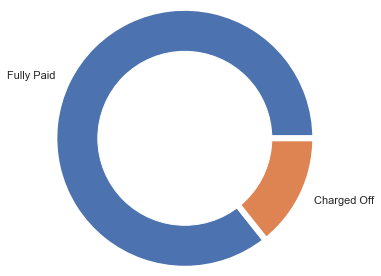

Fully Paid     30017
Charged Off     5016
Name: loan_status, dtype: int64


In [49]:
# Create a pieplot
round_types = loan_data.loan_status.value_counts()
plt.pie(round_types.values, labels=round_types.index, radius=1.5, wedgeprops = { 'linewidth' : 6, 'edgecolor' : 'white' })
# add a circle at the center
my_circle=plt.Circle( (0,0), 1, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()
print(round_types)

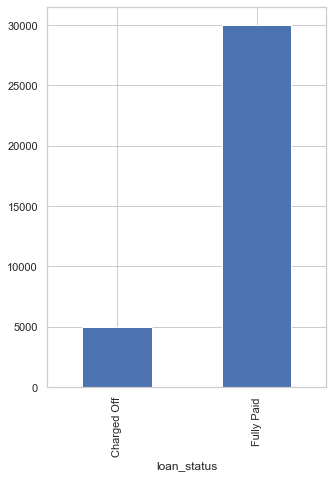

In [50]:
plt.figure(figsize=(5,7))
loan_data.groupby('loan_status').loan_amnt.count().plot.bar()
plt.xlabel('loan_status')
plt.show()

We need to relabel the values to a binary form - 0 or 1, 1 indicating that the person has defaulted and 0 otherwise.

In [51]:
loan_data['loan_status_updated'] = loan_data['loan_status'].apply(lambda x: 0 if x=='Fully Paid' else 1)

# converting loan_status to integer type
loan_data['loan_status_updated'] = loan_data['loan_status_updated'].apply(lambda x: pd.to_numeric(x))

# summarising the values
loan_data['loan_status_updated'].value_counts()

0    30017
1     5016
Name: loan_status_updated, dtype: int64

In [52]:
#Let us first calculate the percentage of defaulters in given data
print("%.2f" % (loan_data.loc[loan_data['loan_status_updated'] == 1].loan_status_updated.count() * 100/len(loan_data)))

14.32


## Category 1: Borrower dependent variables

<font color=blue> __Variable "loan_amnt":__
The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.</font>

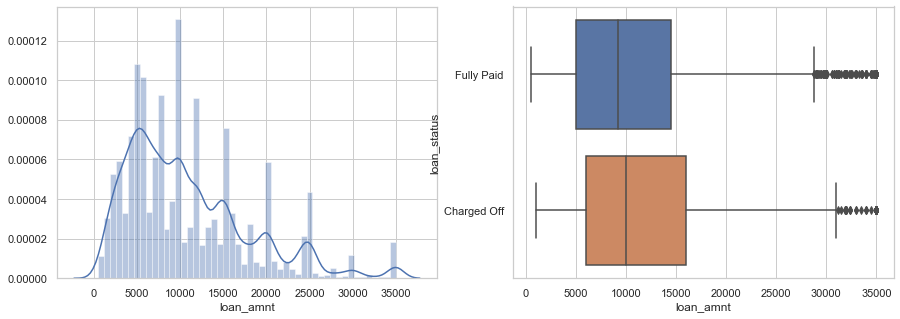

In [53]:
plot_distribution(loan_data,'loan_amnt')

In [54]:
loan_data.groupby('loan_status')['loan_amnt'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,5016.0,12012.848884,7909.211891,1000.0,6000.0,10000.0,16000.0,35000.0
Fully Paid,30017.0,10600.740414,6914.620067,500.0,5000.0,9200.0,14500.0,35000.0


##### Observation:

Overall, the applied loan amount distribution is slightly right-skewed with mean greater than the median. Most of the loans granted are below 15000 (75 percentile value)
Funding amounts see a spike around each 5000 boundary.
Charged off loans are shifted towards higher average loan amount request.

In [55]:
pass

###### Business Driven Metrics:
From here we do binning i.e., group the continuous values into a discrete set 'very high','high','medium','low'
These values are set according to bussiness, but here we are assuming the limit ranges.

__Binning Loan amount:__ It is very difficult to find the loan amount range for which more nuber of loans are taken.
So Let us categorise this continuous into a discrete set
But inorder to this this, we need business to put the cut-offs for all types.
Let us assume the business had given values as 'low' for loan_amnt < 5000,'medium' for loan_amnt between 5000 and 15000,'high' for loan_amnt between 15000 and 25000, 'very high' for loan_amnt > 25000

In [56]:
def loan_amount(x):
    if x < 5000:
        return 'low'
    elif x >=5000 and x < 15000:
        return 'medium'
    elif x >= 15000 and x < 25000:
        return 'high'
    else:
        return 'very high'
        
loan_data['loan_amnt_binning'] = loan_data['loan_amnt'].apply(lambda a: loan_amount(a))
loan_data['loan_amnt_binning'].value_counts()

medium       19190
high          6888
low           6797
very high     2158
Name: loan_amnt_binning, dtype: int64

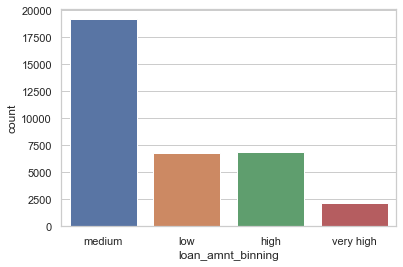

In [57]:
sns.countplot(loan_data.loan_amnt_binning)

In [58]:
# This function plots a given column buckets against loan_status (default = 'Charged Off')
# The plots are in percentages 
# (absolute numbers do not make sense -> category values can have very different absolute numbers)
# We want to see what are the chances of some category leading to loan default
# Absolute numbers are also printed to assess level of confidence in a % value. 
def plotLoanStatus(dataframe, by, loanstatus=1):
    grp = dataframe.groupby(['loan_status_updated',by])[by].count()
    cnt = dataframe.groupby(by)[by].count()
    percentages = grp.unstack() * 100 / cnt.T
    ax = percentages.loc[loanstatus].plot.bar(color=sns.color_palette('husl', 16))
    showLabels(ax, grp[loanstatus].to_dict())
    plt.margins(0.2, 0.2)
    plt.tight_layout()
    return ax

Text(28.25, 0.5, '% of Charged Off')

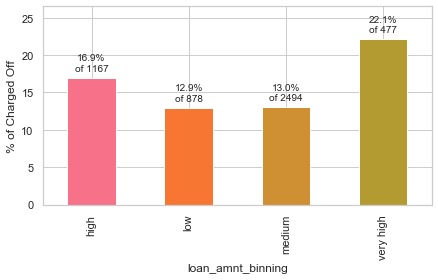

In [59]:
plotLoanStatus(loan_data,'loan_amnt_binning')
plt.ylabel("% of Charged Off")

__Observation:__

The % of charged off loans increases substancially as we go up the loan amount buckets. Most loans are below 25000 amount. The higher loans, though lesser in number, carry a substantially higher risk of default.

Other categorical variables distribution

<font color=blue>Let's see how some other categorical variables of interest are distributed within the dataset
1. home_ownership
2. term
3. verification_status
4. purpose
</font>

In [60]:
def categoricalBarPlots(df, arr):
    rows = int(len(arr)/2)
    for idx, val in enumerate(arr, start=1):
        plt.subplot(rows, 2, idx)
        ax = df.groupby(val).loan_amnt.count().plot.bar(color=sns.color_palette('husl', 16))
        #showLabels(ax)

    plt.tight_layout()

__Obervation:__

1. Most loans are for 36 month term
2. debt_consolidation is by far the largest 'purpose' for seeking a loan

<font color=blue>__Variable: "term":__ The number of payments on the loan. Values are in months and can be either 36 or 60.</font>

[Text(0, 0.5, 'bad loans percent')]

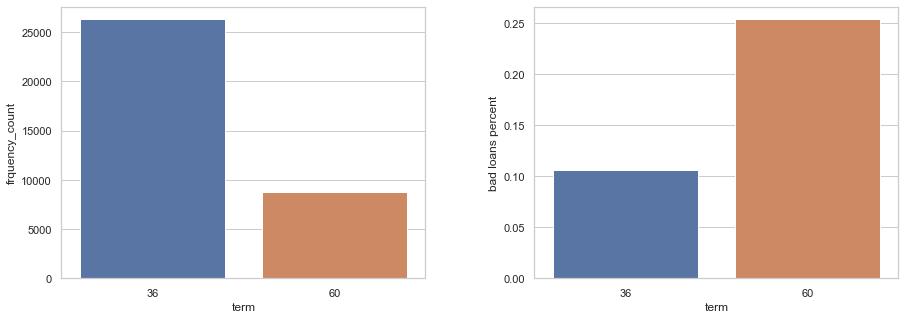

In [61]:
# Grouping by term
term_group = loan_data.groupby('term').mean()["loan_status_updated"]

# Plotting
fig, ax = plt.subplots(1,2, figsize=(15,5))
plt.subplots_adjust(hspace=0.5, wspace=0.3)

fig1 = sns.countplot(loan_data.term, ax=ax[0])
fig1.set(ylabel='frquency_count')

fig2 = sns.barplot(x=term_group.index, y=term_group.values, ax=ax[1])
fig2.set(ylabel='bad loans percent')

#### Observation:
People who taking loans for longer duration are 15% more likely to default

<font color=blue>__Variable: "purpose"__ - A category provided by the borrower for the loan request</font>

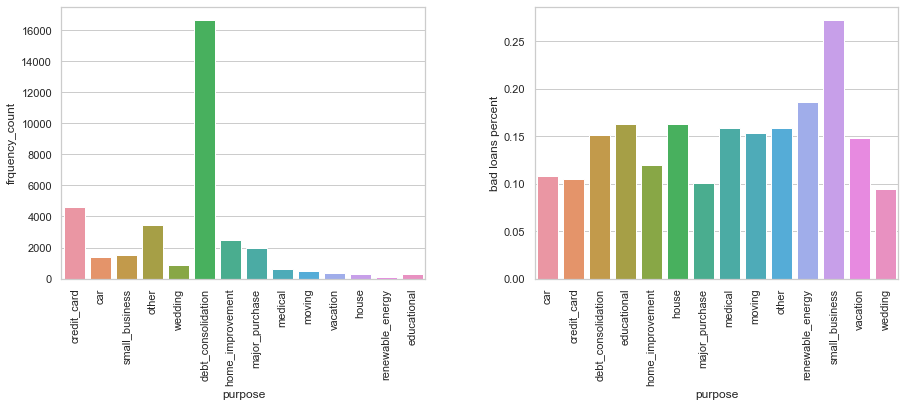

In [62]:
# Grouping by term
purpose_group = loan_data.groupby('purpose').mean()["loan_status_updated"]

# Plotting
fig, ax = plt.subplots(1,2, figsize=(15,5))
plt.subplots_adjust(hspace=0.5, wspace=0.3)

fig1 = sns.countplot(loan_data.purpose, ax=ax[0])
fig1.set(ylabel='frquency_count')
fig1.set_xticklabels(fig1.get_xticklabels(),rotation=90)

fig2 = sns.barplot(x=purpose_group.index, y=purpose_group.values, ax=ax[1])
fig2.set(ylabel='bad loans percent')
fig2.set_xticklabels(fig2.get_xticklabels(),rotation=90)
pass

###### Observation:
More number of loans were taken for debt_consolidation
Loans taken for small buisness have more than 25% chance of defaulting

<font color=blue> __Variable "emp_length"__ - Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years.

In [63]:
loan_data.emp_length.value_counts(normalize=True)

10    0.222990
0     0.119088
2     0.115034
3     0.107641
4     0.090115
5     0.085919
1     0.084292
6     0.058402
7     0.046271
8     0.037679
9     0.032569
Name: emp_length, dtype: float64

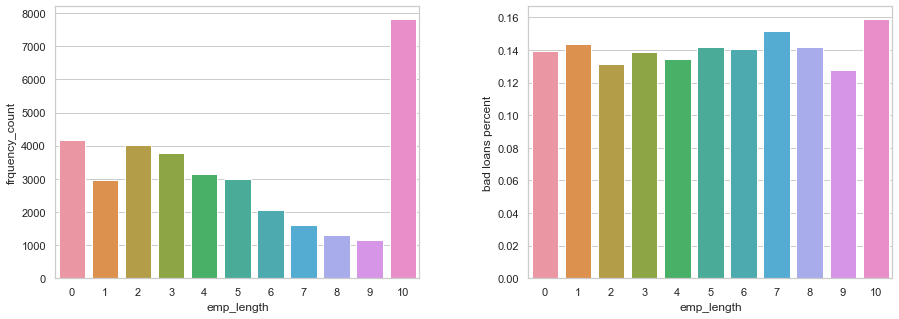

In [64]:
# Grouping by emp_length
emp_length_group = loan_data.groupby('emp_length').mean()["loan_status_updated"]

# Plotting
fig, ax = plt.subplots(1,2, figsize=(15,5))
plt.subplots_adjust(hspace=0.5, wspace=0.3)

fig1 = sns.countplot(loan_data.emp_length, ax=ax[0])
fig1.set(ylabel='frquency_count')

fig2 = sns.barplot(x=emp_length_group.index, y=emp_length_group.values, ax=ax[1])
fig2.set(ylabel='bad loans percent')
pass

#### Observation:

Majority of the of loan takeres have an employment length of more than 10 years.

<font color=blue> __Variable: "home_ownership"__ - The home ownership status provided by the borrower during registration. Our values are: RENT, OWN, MORTGAGE, OTHER.

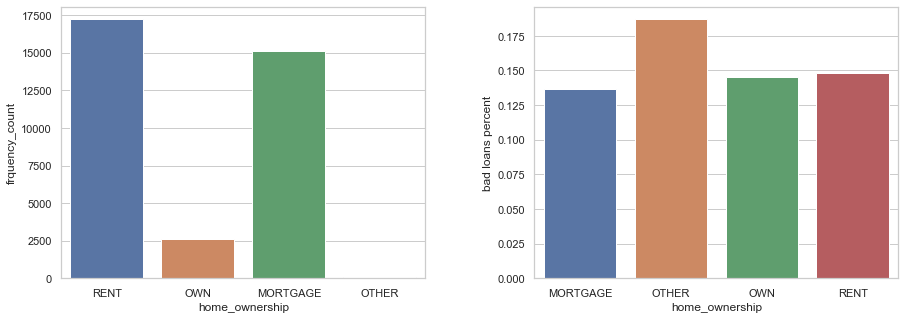

In [65]:
# Grouping by home_ownership
home_ownership_group = loan_data.groupby('home_ownership').mean()["loan_status_updated"]

# Plotting
fig, ax = plt.subplots(1,2, figsize=(15,5))
plt.subplots_adjust(hspace=0.5, wspace=0.3)

fig1 = sns.countplot(loan_data.home_ownership, ax=ax[0])
fig1.set(ylabel='frquency_count')

fig2 = sns.barplot(x=home_ownership_group.index, y=home_ownership_group.values, ax=ax[1])
fig2.set(ylabel='bad loans percent')
pass

#### Observation:

People with home ownership as Other are approx 5% more likely to default as comare to others

<font color=blue> __Variable: "verification_status"__ </font>

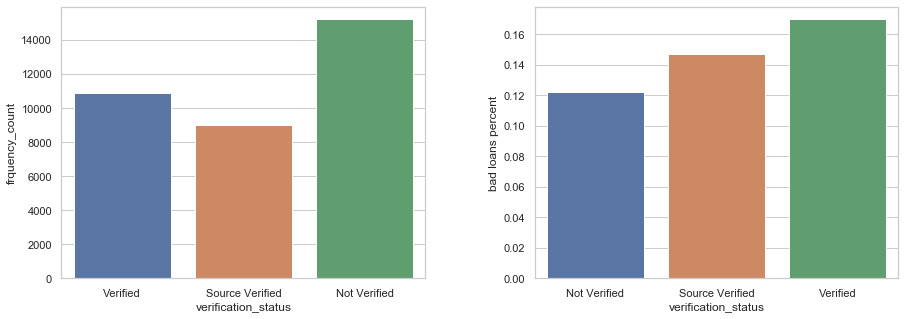

In [66]:
# Grouping by verification_status
verification_status_group = loan_data.groupby('verification_status').mean()["loan_status_updated"]

# Plotting
fig, ax = plt.subplots(1,2, figsize=(15,5))
plt.subplots_adjust(hspace=0.5, wspace=0.3)

fig1 = sns.countplot(loan_data.verification_status, ax=ax[0])
fig1.set(ylabel='frquency_count')

fig2 = sns.barplot(x=verification_status_group.index, y=verification_status_group.values, ax=ax[1])
fig2.set(ylabel='bad loans percent')
pass

#### Observation:

There are more number of loans for not verified.It means Lnding club had to take this seriously.
Surprisingly, more of the customers whose income was verified are charged off.This require more analysis.

<font color=blue> __Variable: "annual_inc"__ - The self-reported annual income provided by the borrower during registration.</font>

In [67]:
loan_data.annual_inc.describe(percentiles=[0.1, 0.25, 0.5, 0.75, 0.9])

count     35033.000000
mean      61881.950270
std       28133.787348
min        4000.000000
10%       30000.000000
25%       40000.000000
50%       57000.000000
75%       79000.000000
90%      102000.000000
max      145900.000000
Name: annual_inc, dtype: float64

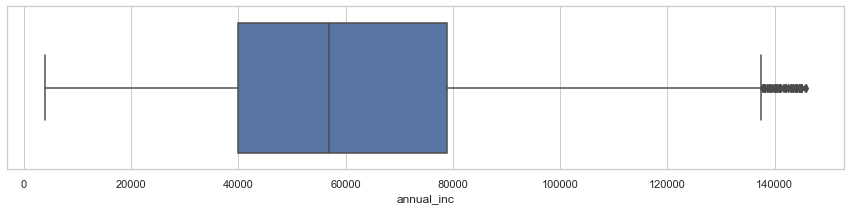

In [68]:
plt.figure(figsize=(15, 3))
sns.boxplot(x=loan_data['annual_inc'], data=loan_data)

The annual income reprted by the borrowers range from min of 4,000 to max of 6,000,000.
Median annual income is around 60,000
Most people have an annual income less than 115000

In [69]:
# Let's get rid of outliers to analyze annual income. 
# Keep only the ones that are within +3 to -3 standard deviations in the column 'Data'.
df =loan_data[np.abs(loan_data.annual_inc-loan_data.annual_inc.mean()) <= (3*loan_data.annual_inc.std())]

In [70]:
df.annual_inc.describe()

count     35033.000000
mean      61881.950270
std       28133.787348
min        4000.000000
25%       40000.000000
50%       57000.000000
75%       79000.000000
max      145900.000000
Name: annual_inc, dtype: float64

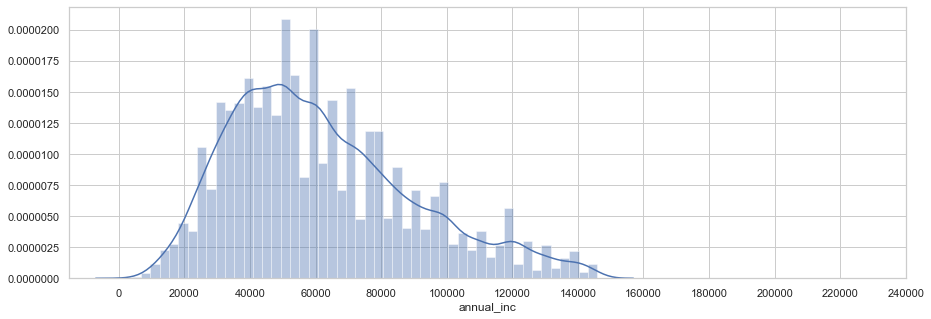

In [71]:
plt.figure(figsize=(15, 5))
sns.distplot(df['annual_inc'], hist_kws={'log':False})
plt.xticks(np.arange(0, 260000, 20000))
plt.show()

#### Observation:

10000 seems to be a good bin size to further analyze income as categories

In [72]:
loan_data['income_bin'] = loan_data['annual_inc']/20000
loan_data['income_bin'] = loan_data['income_bin'].astype(int)

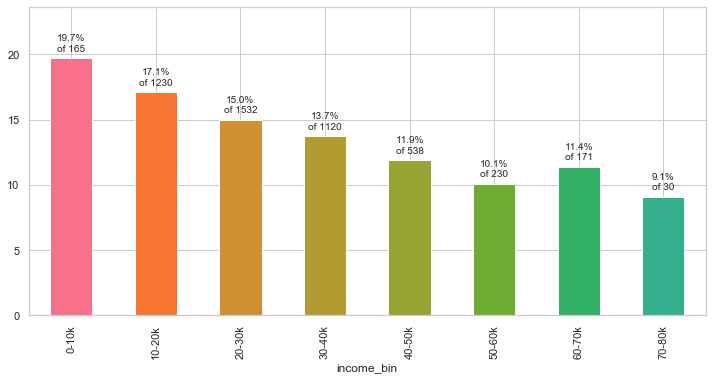

In [73]:
plt.figure(figsize=(10,5))
ax = plotLoanStatus(loan_data.loc[loan_data['income_bin']<21], 'income_bin')
ax.set_xticklabels([(str(int(x.get_text())*10)+'-'+str(int(x.get_text())*10+10)+'k') for x in ax.get_xticklabels()])
pass

##### Observation:

It will be interesting to see a bivariate analysis of defaults by income buckets and loan amounts later.

<font color=blue> __Variable: "addr_state"__ - The state provided by the borrower in the loan application

In [74]:
loan_data.addr_state.value_counts

<bound method IndexOpsMixin.value_counts of 0        AZ
1        GA
2        IL
3        CA
5        AZ
         ..
39562    VA
39573    AZ
39623    MD
39666    VA
39680    IN
Name: addr_state, Length: 35033, dtype: object>

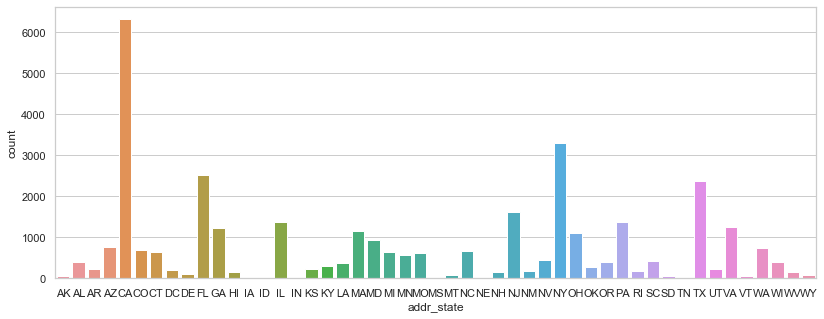

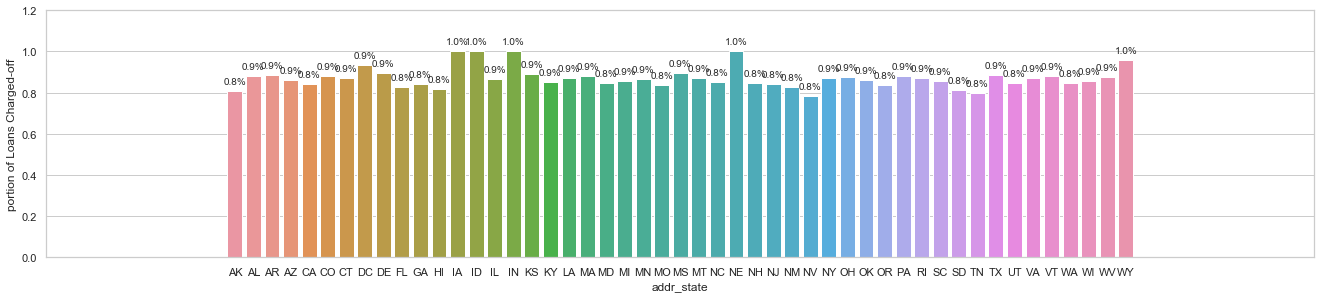

In [75]:
plt.figure(figsize=(30,5))
plt.subplot(1, 2, 1)
sns.countplot(loan_data['addr_state'], order=sorted(loan_data.addr_state.unique()))

#Fraction of loans charged off and fully Paid
charge_off_count = loan_data.groupby('addr_state')['loan_status_updated'].value_counts(normalize=True).loc[:,0]  
Fully_paid_count = loan_data.groupby('addr_state')['loan_status_updated'].value_counts(normalize=True).loc[:,1]  

plt.figure(figsize=(50,10))
plt.subplot(2, 2, 1)
a=sns.barplot(x=charge_off_count.index, y=charge_off_count.values)
a.set_ylabel('portion of Loans Charged-off')
showLabels(a)
plt.show()

##### Observation:

Maximum loans ~18% are from California following that is 9.5% from New york state and Florida with 7%. This is to be expected as these are also the three most populous US states
States with higher Charge Off rates have very low number of loans. The percentage is therefore NOT significant and should be ignored. Overall, this variable does not affect propensity to default.

# Category 2 : Loan dependent variables

<font color=blue> __Variable: revol_util__ - Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.</font>

In [76]:
loan_data.revol_util.describe()

count    35033.000000
mean        48.946718
std         28.233638
min          0.000000
25%         25.600000
50%         49.400000
75%         72.300000
max         99.900000
Name: revol_util, dtype: float64

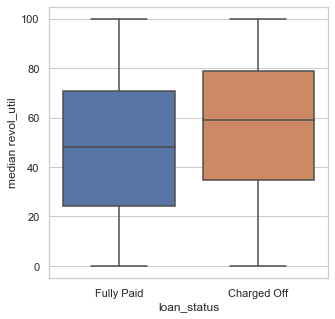

In [77]:
fig, ax = plt.subplots(1,1, figsize=(5,5))
plt.subplots_adjust(hspace=0.6, wspace=0.3)

fig1 = sns.boxplot(x='loan_status', y='revol_util', data=loan_data, ax=ax)
fig1.set(ylabel='median revol_util')
pass

__Observation:__

The average utilization rate is around 49%
This requires more analysis.

In [78]:
loan_data['revol_util_bin'] = round(loan_data['revol_util']/5)

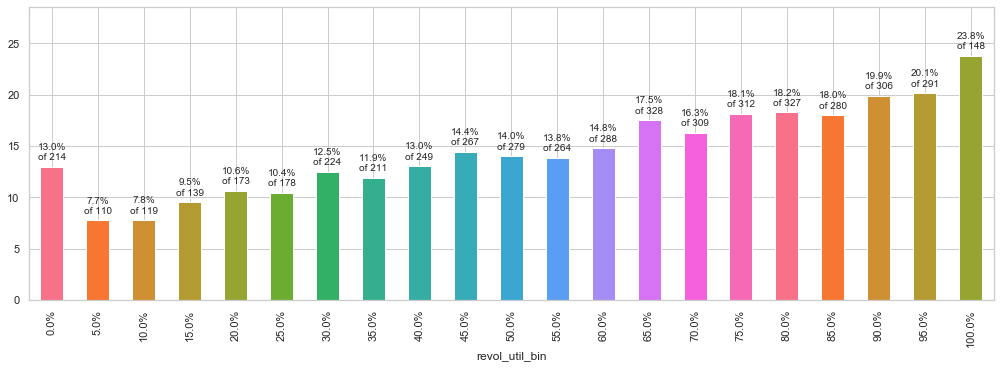

In [79]:
plt.figure(figsize=(14,5))
ax = plotLoanStatus(loan_data, 'revol_util_bin')
ax.set_xticklabels([(str(float(x.get_text())*5)+'%') for x in ax.get_xticklabels()])
plt.show()

##### Observation:
The revol_util above 60% have more number of defaulters.This requires more analysis

<font color=blue>__Variable: pub_rec_bankruptcy__ - Number of public record bankruptcies

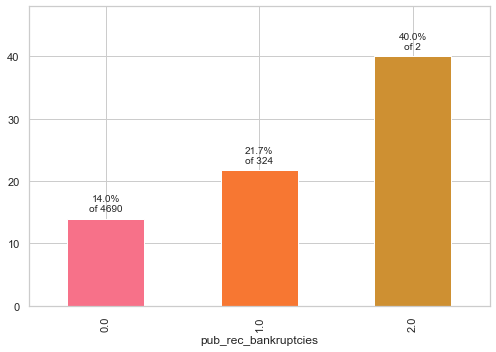

In [80]:
plt.figure(figsize=(7,5))
plotLoanStatus(loan_data, 'pub_rec_bankruptcies')

###### Observation:
We have 40% of customers as defaulters with bankruptcies record as 2.

<font color=blue>__Variable: earliest_cr_line__ - The month the borrower's earliest reported credit line was opened.</font>

In [81]:
loan_data.earliest_cr_line_year.value_counts(normalize=True).head()

2000    0.083949
1999    0.077099
1998    0.073074
2001    0.066423
1997    0.062627
Name: earliest_cr_line_year, dtype: float64

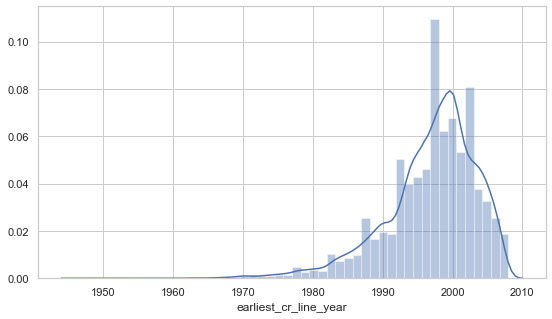

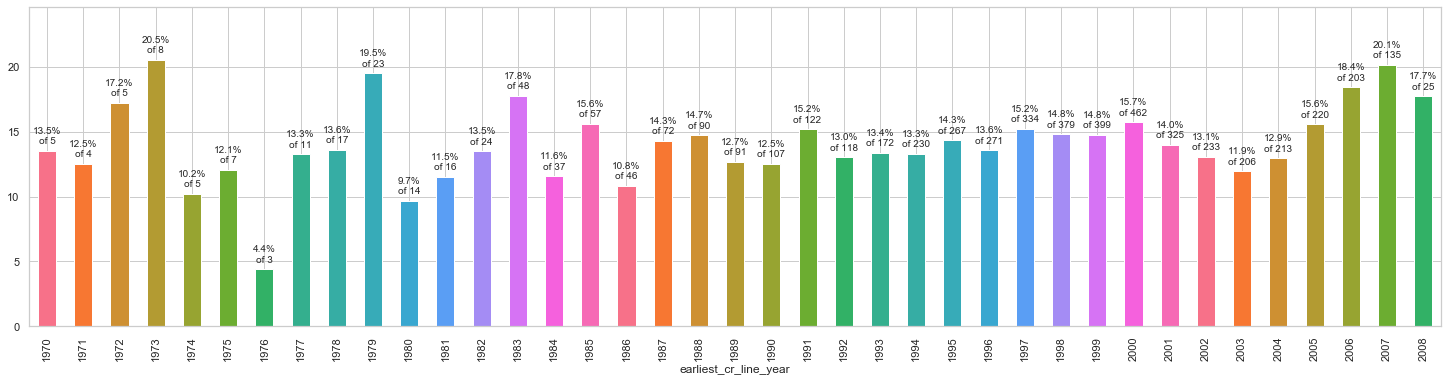

In [82]:
plt.figure(figsize=(20,5))
plt.subplot(1, 2, 1)
sns.distplot(loan_data['earliest_cr_line_year'])
plt.figure(figsize=(40,10))
plt.subplot(2, 2, 1)
plotLoanStatus(loan_data.loc[loan_data['earliest_cr_line_year'] > 1969], 'earliest_cr_line_year')
plt.show()

###### Observation:

8% of the loan applicants have 2000 as the year of earliest credit line.
Newer borrowers are defauling more often. This is possibly related to the 2008 subprime crisis.

<font color=blue> __Variable: int_rate__ - Interest Rate on the loan.

In [83]:
loan_data.int_rate.describe()

count    35033.000000
mean        11.936380
std          3.677957
min          5.420000
25%          8.940000
50%         11.830000
75%         14.420000
max         24.400000
Name: int_rate, dtype: float64

<Figure size 1080x360 with 0 Axes>

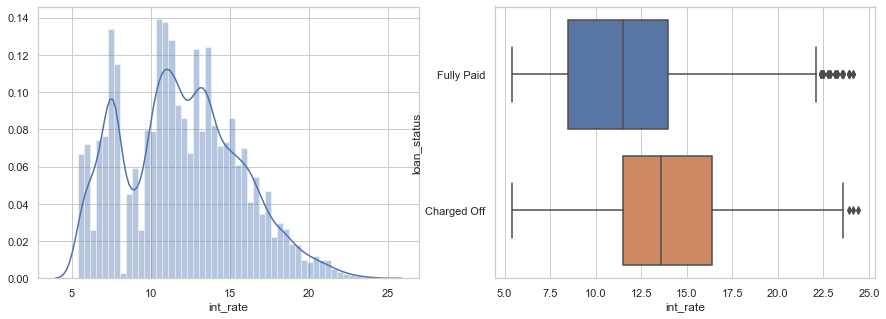

In [84]:
plt.figure(figsize=(15,5))
plot_distribution(loan_data, 'int_rate')

In [85]:
loan_data.groupby('loan_status')['int_rate'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,5016.0,13.864960,3.635715,5.42,11.48,13.61,16.40,24.40
Fully Paid,30017.0,11.614104,3.585249,5.42,8.49,11.49,13.99,24.11


In [86]:
loan_data['interest_rate_buckets'] = round(loan_data['int_rate'])

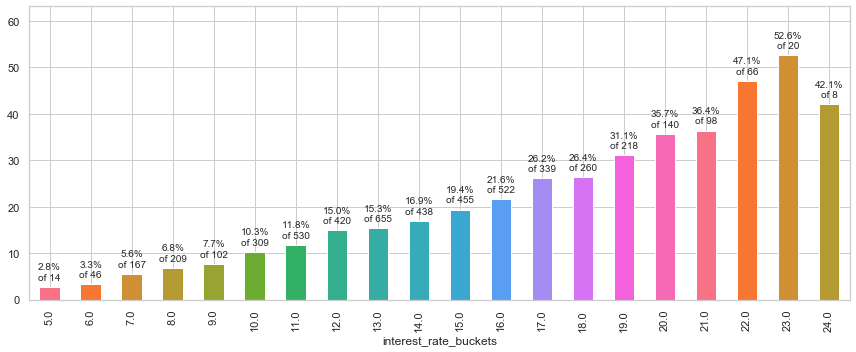

In [87]:
plt.figure(figsize=(12,5))
plotLoanStatus(loan_data, 'interest_rate_buckets')

##### Observation:

Overall, the intrest rate varies from 5.42% to 24.4% with average intrest rate of 11.8%.
The intrest rate for Charged Off loans appear to be higher than for Fully paid. This is naturally expected. As, the risk increases the rate of interest imposed on the loan also increases. Let's analyze this more.

<font color=blue> __Variable: grade and sub_grade__ - LC assigned loan grade and subgrade.</font>

In [88]:
loan_data.grade.value_counts()

B    10633
A     9168
C     7134
D     4615
E     2368
F      855
G      260
Name: grade, dtype: int64

Let's find the frequencies of the unique sub_grade.

In [89]:
loan_data.sub_grade.value_counts(normalize=True).head()

A4    0.075757
B3    0.073074
A5    0.071390
B5    0.068707
B4    0.064140
Name: sub_grade, dtype: float64

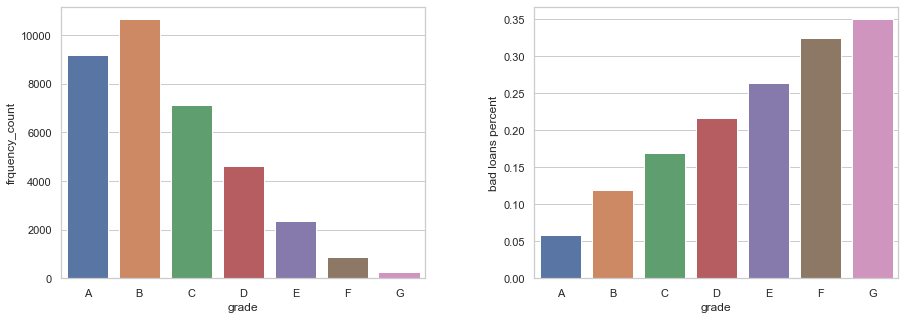

In [90]:
# Grouping by grade
grade_group = loan_data.groupby('grade').mean()["loan_status_updated"]

# Plotting
fig, ax = plt.subplots(1,2, figsize=(15,5))
plt.subplots_adjust(hspace=0.5, wspace=0.3)

fig1 = sns.countplot(loan_data.grade.sort_values(), ax=ax[0])
fig1.set(ylabel='frquency_count')

fig2 = sns.barplot(x=grade_group.index, y=grade_group.values, ax=ax[1])
fig2.set(ylabel='bad loans percent')
pass

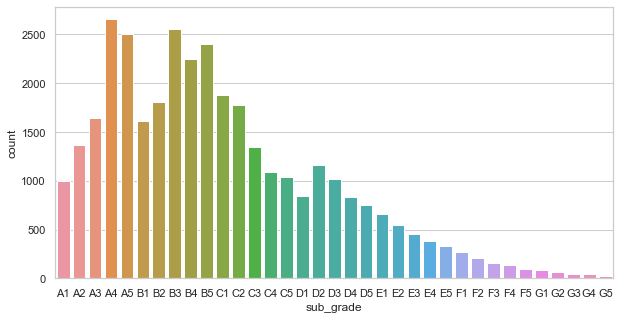

In [91]:
plt.figure(figsize=(10,5))
sns.countplot(loan_data['sub_grade'], order=sorted(loan_data.sub_grade.unique()))
plt.show()

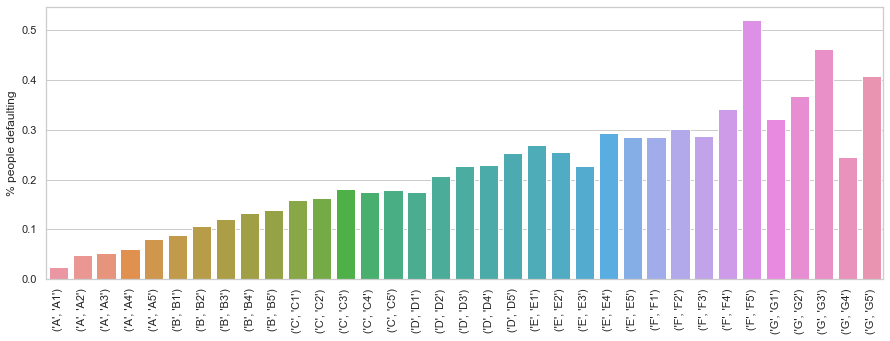

In [92]:
# How % people defaulting varies with grade and sub-grade
group_garde_subgrade = loan_data.groupby(['grade', 'sub_grade']).mean()['loan_status_updated']

fig, ax = plt.subplots(1, 1, figsize=(15,5))
plt.subplots_adjust(hspace=0.5, wspace=0.3)

fig1 = sns.barplot(x=group_garde_subgrade.index, y=group_garde_subgrade.values)
fig1.set(ylabel='% people defaulting')
fig1.set_xticklabels(fig1.get_xticklabels(),rotation=90)
pass

##### Observation:

Grade A and B loans are safe. The percentages in full dataset are much higher than percentages in Charged Off loans.
Grade D, E, F, G loans are less safe.
Lending Clubs grading system is working well.

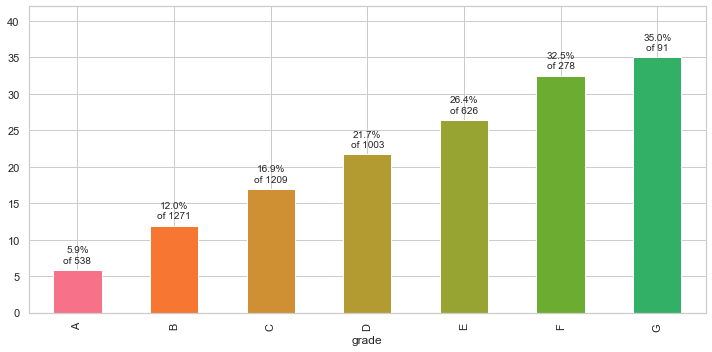

In [93]:
plt.figure(figsize=(10,5))
plotLoanStatus(loan_data, 'grade')

###### Observation:

Nearly 30% of all loans in Grades F and G see a default.
Grade E onwards are risky, and less numerous.

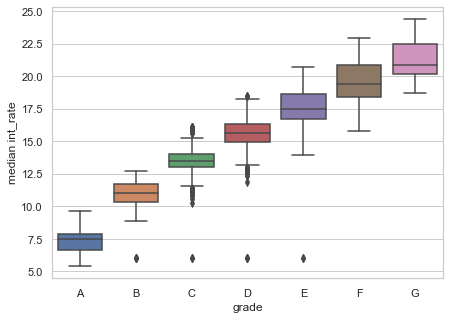

In [94]:
order_grade = ['A', 'B', 'C', 'D', 'E', 'F', 'G']

fig, ax = plt.subplots(1,1, figsize=(7,5))
plt.subplots_adjust(hspace=0.6, wspace=0.3)

fig1 = sns.boxplot(x='grade', y='int_rate', data=loan_data, order=order_grade, ax=ax)
fig1.set(ylabel='median int_rate')
pass

##### Observation:

Here we see that Lending Club is, correctly, charging higher interest rates for lower grade loans.

<font color=blue> __Variable: "verification_status"__ </font> - Indicates if income was verified by LC, not verified, or if the income source was verified

In [95]:
loan_data.verification_status.value_counts()

Not Verified       15188
Verified           10850
Source Verified     8995
Name: verification_status, dtype: int64

Loans 'Verified' and 'Source Verified' status both imply that LC has cross checked the income value specified by the borrower and thus both statuses can be treated as one.

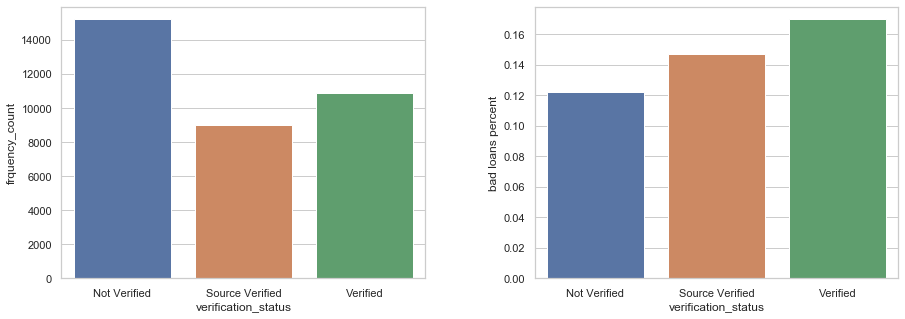

In [96]:
# Grouping by verification_status
verification_status_group = loan_data.groupby('verification_status').mean()["loan_status_updated"]

# Plotting
fig, ax = plt.subplots(1,2, figsize=(15,5))
plt.subplots_adjust(hspace=0.5, wspace=0.3)

fig1 = sns.countplot(loan_data.verification_status.sort_values(), ax=ax[0])
fig1.set(ylabel='frquency_count')

fig2 = sns.barplot(x=verification_status_group.index, y=verification_status_group.values, ax=ax[1])
fig2.set(ylabel='bad loans percent')
pass

##### Observation:

Overall, it appears that there are more 'Non Verified' loans than the 'Source Verified' and 'Verified' loans. LC should take steps to verify these loans income so as to reduce the Charge Off percentage.
This is unexpected and will be investigated later in bivariate analysis.

<font color=blue> __Variable: issue_d__ - The date which the loan was funded</font>

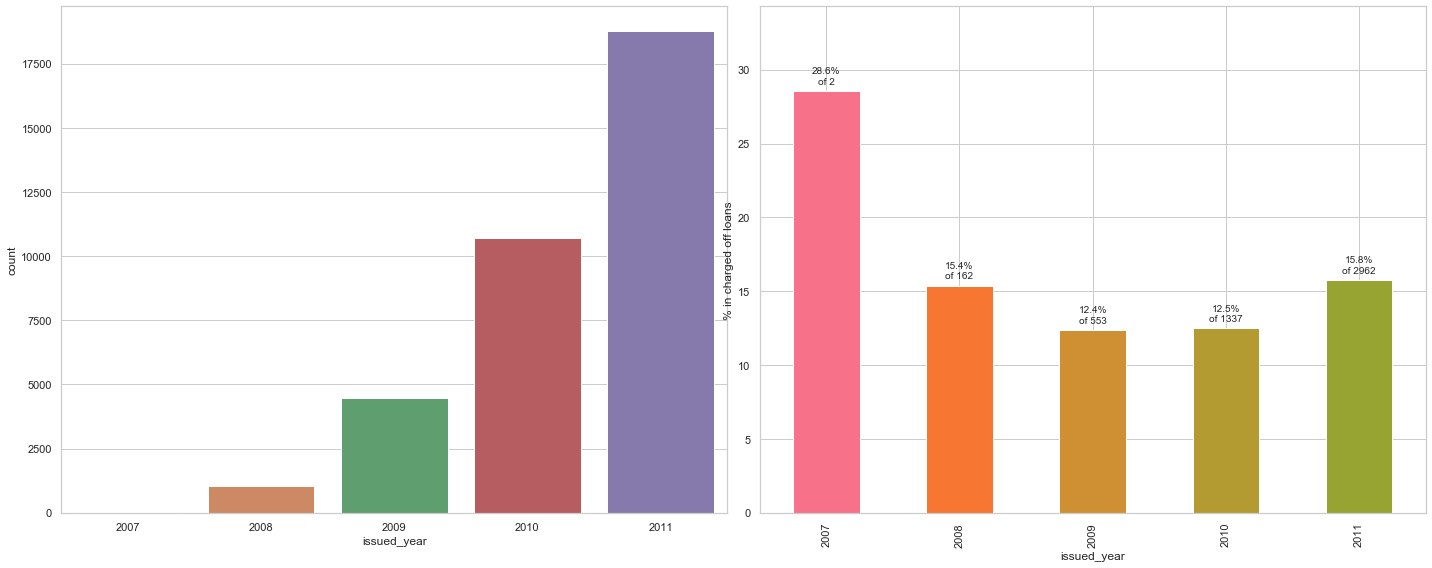

In [97]:
plt.figure(figsize=(20,8))
plt.subplot(1, 2, 1)
sns.countplot(loan_data['issued_year'], order=sorted(loan_data.issued_year.unique()))
#Fraction of loans charged off and fully Paid
plt.subplot(1, 2, 2)
plotLoanStatus(loan_data, 'issued_year')
plt.ylabel('% in charged off loans')
plt.show()

##### Observation:

Over the years, LC as an organisation has been giving more loans. From Aug,2007 to 2011 the loans issued have risen significantly.
Year of loan has no significant effect on likelihood of default.

<font color=blue> __Variable: dti__ - A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income.</font>

In [98]:
loan_data.dti.describe()

count    35033.000000
mean        13.502731
std          6.638062
min          0.000000
25%          8.430000
50%         13.640000
75%         18.740000
max         29.990000
Name: dti, dtype: float64

<Figure size 720x360 with 0 Axes>

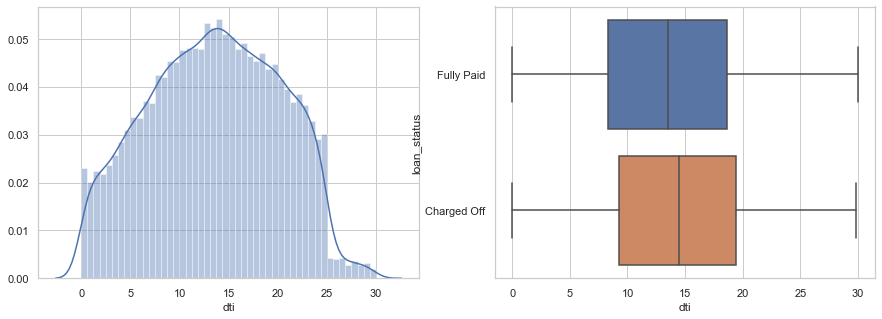

In [99]:
plt.figure(figsize=(10,5))
plot_distribution(loan_data, 'dti')

In [100]:
# Create derived variable 
loan_data['dti_binning'] = pd.cut(loan_data['dti'], [0,5,10,15,20,25,30], labels=['0-5','5-10','10-15','15-20','20-25','25-30'])

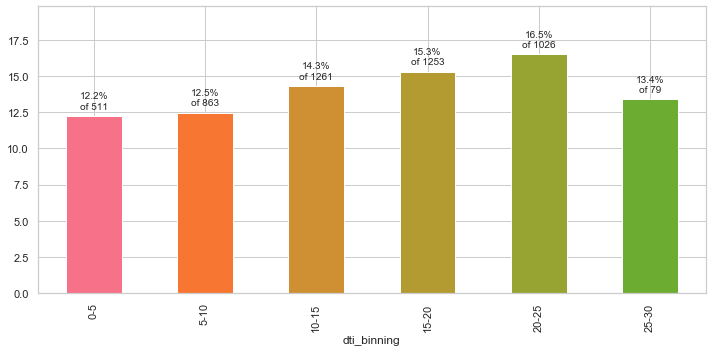

In [101]:
plt.figure(figsize=(10,5))
plotLoanStatus(loan_data,'dti_binning')

#### Observation:

When the dti or dept payment to income ratio is higher than 20, higher percentage of loans are Charged Off.
Higher the dti higher are the chances of loan being Charged Off

## Data Derived variable - ratio of loan amount to annual income

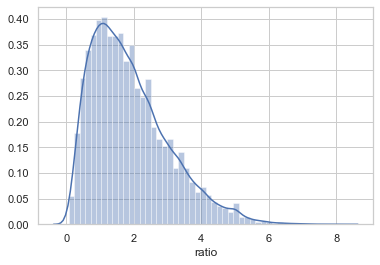

In [102]:
loan_data['ratio'] = loan_data['loan_amnt'] * 10 /loan_data['annual_inc']
sns.distplot(loan_data['ratio'])

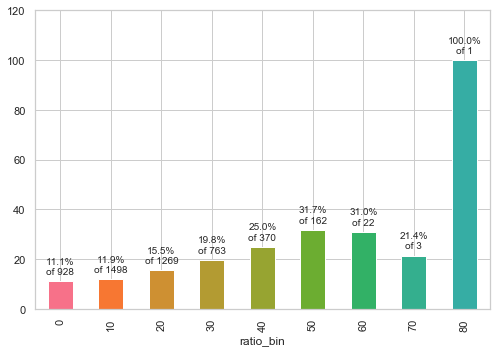

In [103]:
loan_data['ratio_bin'] = (loan_data['ratio'].astype(int)) * 10
plt.figure(figsize=(7,5))
plotLoanStatus(loan_data, 'ratio_bin')

###### Observation:

As long as loan amount is less than 20% of annual income, defaults are low.

<font color=blue> __Variable: delinq_2yrs__ - The number of 30+ days past-due incidences of delinquency in the borrower's credit file for the past 2 years.</font>

In [104]:
loan_data.delinq_2yrs.value_counts(normalize=True)

0     0.892444
1     0.083036
2     0.016584
3     0.005366
4     0.001513
5     0.000542
6     0.000285
7     0.000114
8     0.000057
11    0.000029
9     0.000029
Name: delinq_2yrs, dtype: float64

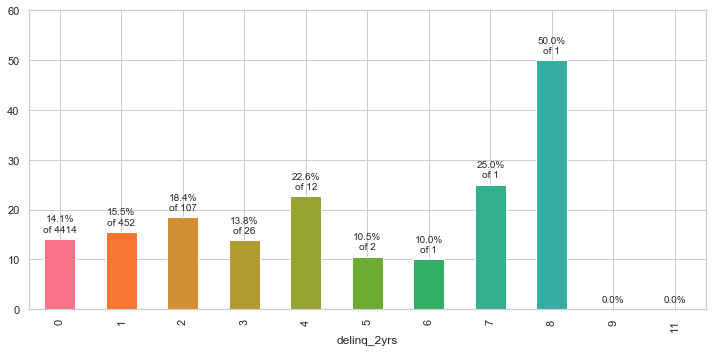

In [105]:
plt.figure(figsize=(10,5))
plotLoanStatus(loan_data, 'delinq_2yrs')

###### Observation:

The number of 30+ days past-due incidences of delinquency in the borrower's credit file for the past 2 years values ranges between 0 and 11.
There are higher chances of default if this variable is greater than 1

# Bivariate Analysis

#### loan_amnt over time

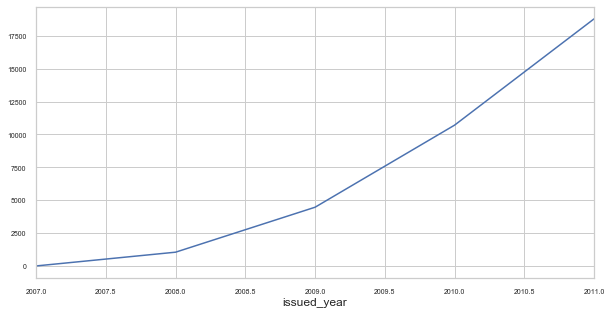

In [106]:
plt.figure(figsize=(10,5))
loan_data.groupby('issued_year').loan_amnt.count().plot(kind='line', fontsize=7)
plt.show()

##### Average loan_amnt over time

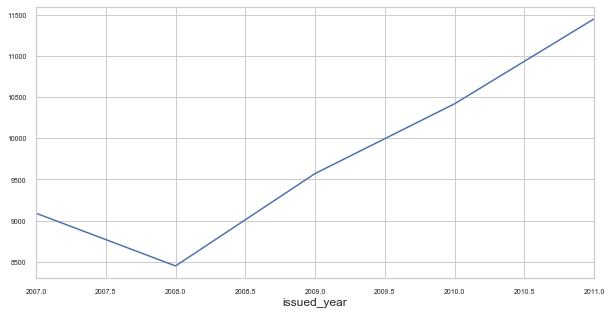

In [107]:
plt.figure(figsize=(10,5))
loan_data.groupby('issued_year').loan_amnt.mean().plot(kind='line', fontsize=7)
plt.show()

###### Observation: 
Average loan amount dropped sharply in 2008 , may be there is a crisis hit in that year.

##### loan_amnt and annual_inc

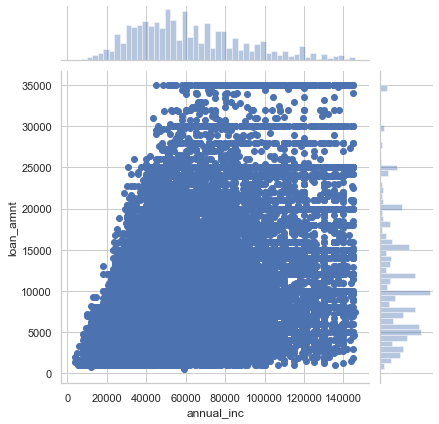

In [108]:
sns.jointplot('annual_inc', 'loan_amnt',loan_data.loc[loan_data['annual_inc']<260000])
plt.show()

###### Observation:

There are people with average income lower than 50000 taking loans of 25000 or higher. These would be risky loans.

##### loan_amnt vs grade

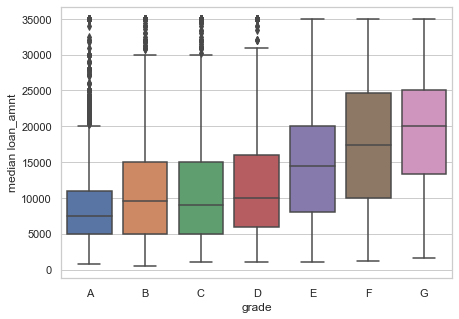

In [109]:
fig, ax = plt.subplots(1,1, figsize=(7,5))
plt.subplots_adjust(hspace=0.6, wspace=0.3)

fig1 = sns.boxplot(x='grade', y='loan_amnt', data=loan_data, order=order_grade, ax=ax)
fig1.set(ylabel='median loan_amnt')
pass

###### Observation:
Larger loans generally appear to be given a lower grade, with the median loan amount for a grade G loan being almost 10000 higher than that of a grade A, B, or C loan.

###### annual income with grade

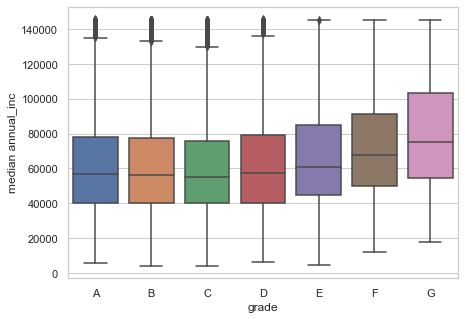

In [110]:
fig, ax = plt.subplots(1,1, figsize=(7,5))
plt.subplots_adjust(hspace=0.6, wspace=0.3)

fig1 = sns.boxplot(x='grade', y='annual_inc', data=loan_data, order=order_grade, ax=ax)
fig1.set(ylabel='median annual_inc')
pass

###### Observation:

Intrest rates are besed on term. Larger amounts were seen to be given for higher term. Ther rate of intrest associated with them is also high.

###### Interest Rate and Sub Grade

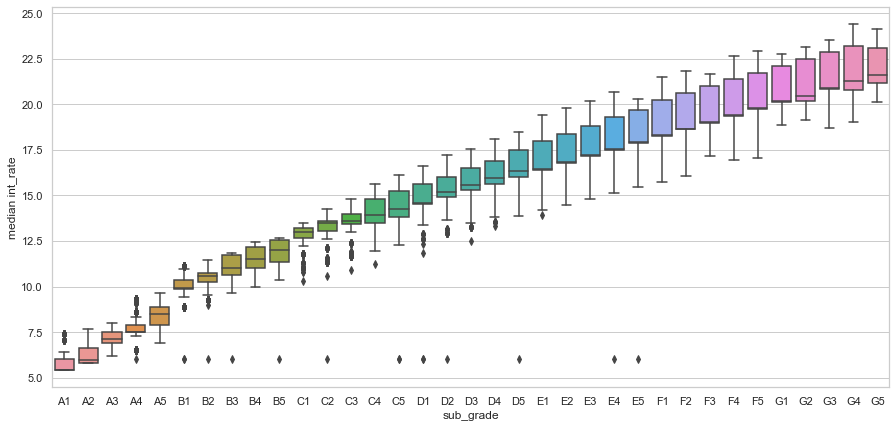

In [111]:
order_sub_grade = np.sort(loan_data.sub_grade.unique())

fig, ax = plt.subplots(1,1, figsize=(15,7))
plt.subplots_adjust(hspace=0.6, wspace=0.3)

fig1 = sns.boxplot(x='sub_grade', y='int_rate', data=loan_data, order=order_sub_grade, ax=ax)
fig1.set(ylabel='median int_rate')
pass

###### Observation:

Intrest rates varies directly with the subgrade. Larger or worst the sub grade, higher are the rate of intrest for the loan.

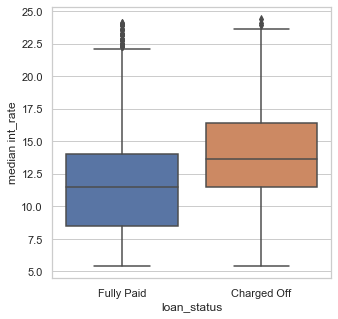

In [112]:
fig, ax = plt.subplots(1,1, figsize=(5,5))
plt.subplots_adjust(hspace=0.6, wspace=0.3)

fig1 = sns.boxplot(x='loan_status', y='int_rate', data=loan_data, ax=ax)
fig1.set(ylabel='median int_rate')
pass

##### Observation:

Loans at a higher intrest rate are more likely to be Charged Off.

###### Loan amount vs Grade vs Term

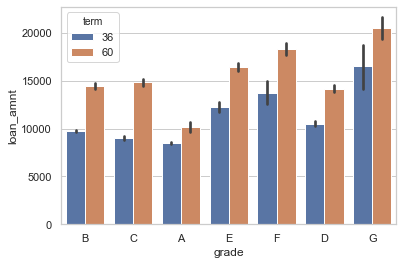

In [113]:
sns.barplot(x='grade', y='loan_amnt', hue="term", data=loan_data, estimator=np.mean)
plt.show()

###### Observation:

Our assumption made during univariate analysis is more evident with this plot. Higher loan amount are associated with lower grade for longer terms.

##### Loan amount Vs term Vs Loan Status

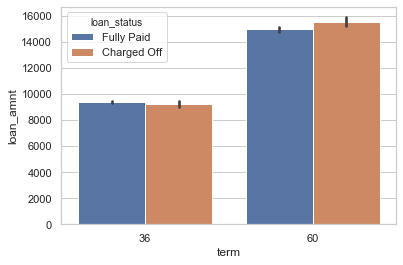

In [114]:
sns.barplot(x='term', y='loan_amnt', hue="loan_status", data=loan_data, estimator=np.mean)
plt.show()

###### Observation:

Our assumption made during univariate analysis is more evident with this plot. Higher loan amount are associated with longer terms and see higher Charge Offs.

###### Loan amount Vs addr_state vs loan Status

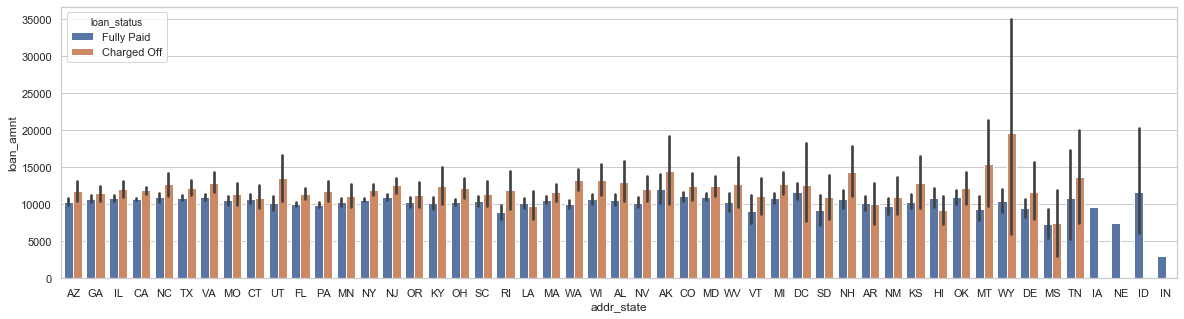

In [115]:
plt.figure(figsize=(20,5))
sns.barplot(x='addr_state', y='loan_amnt', hue='loan_status',data=loan_data, estimator=np.mean)
plt.show()

###### Observation:

States WY: Wyoming has the the highest average loan amount that was charged off. whats happening in this state is somthing LC can investigate into for this state.

<font color=blue>revol_util Vs grade Vs Loan Status</font>

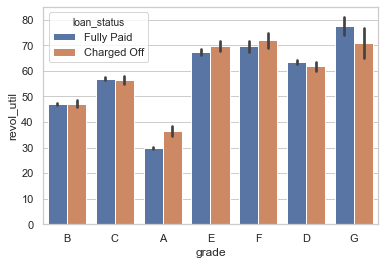

In [116]:
sns.barplot(x='grade', y='revol_util', hue="loan_status", data=loan_data, estimator=np.mean)
plt.show()

__Observation:__

revol_util and grade(and therefore int_rate) are correlated in some way. The revol_util is positivly correlated to the grade. As the grade goes from A to E the revol_util also increases. This may be because higer loan amounts are accosiated with higher grades.

<font color=blue>revol_rate Vs int_rate</font>

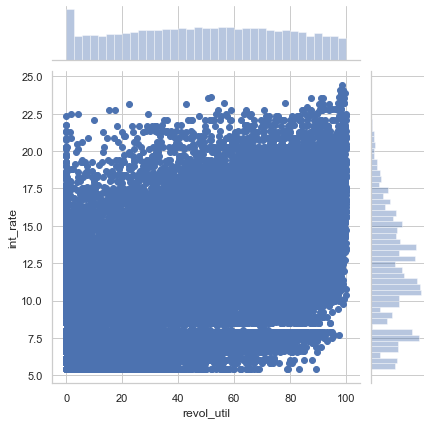

In [117]:
sns.jointplot('revol_util', 'int_rate',loan_data)

<font color=blue>revol_util vs Grade</font>

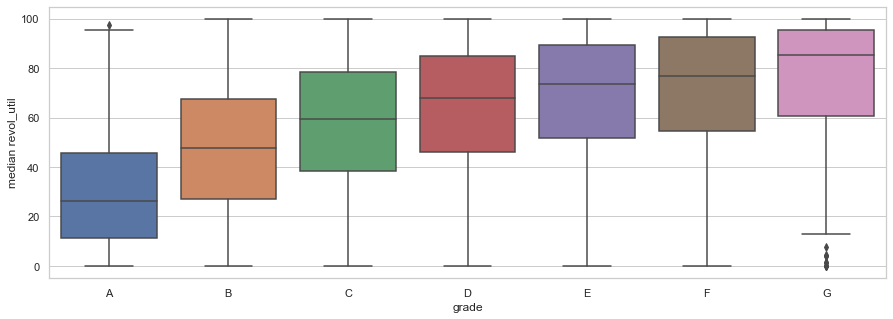

In [118]:
fig, ax = plt.subplots(1,1, figsize=(15,5))

fig1 = sns.boxplot(x='grade', y='revol_util', data=loan_data, order=order_grade, ax=ax)
fig1.set(ylabel='median revol_util')
pass

###### Observation:
As the revolving utilisation increases it falls into lower grade i.e., 'G'.Hence our assumption in univariate analysis that the revol_util above 60% have more number of defaulters.

<font color=blue>pub_rec_bankruptcies Vs int_rate Vs loan_amnt</font>

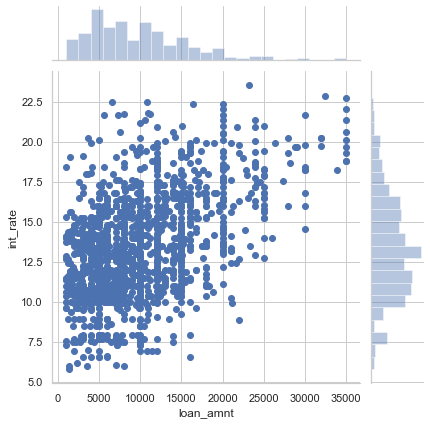

In [119]:
sns.jointplot('loan_amnt', 'int_rate', loan_data.loc[loan_data.pub_rec_bankruptcies > 0])

<font color=blue>delinq_2yr VS loan amount VS grade</font>

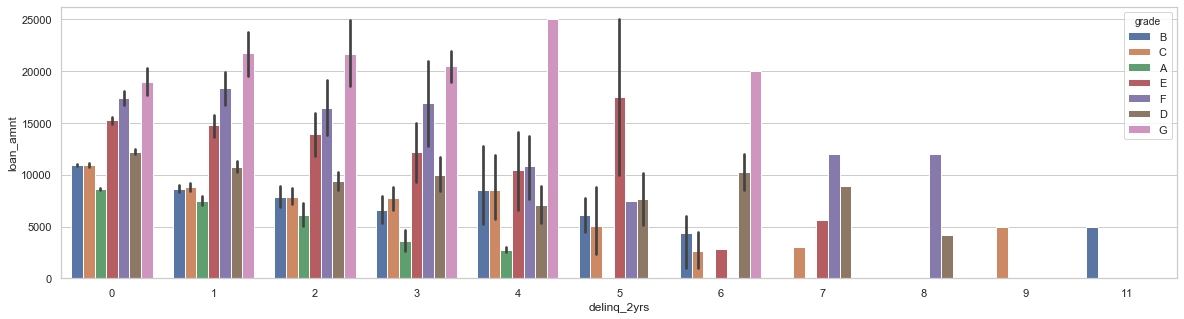

In [120]:
plt.figure(figsize=(20,5))
sns.barplot(x='delinq_2yrs', y='loan_amnt', hue='grade',data=loan_data, estimator=np.mean)
plt.show()

###### Observation:

Not many loans receive invstment with higher number of delinquencies(>3). Despite the low loan amount request, these loans are considered risky and are not invested much in.
Lending club should further restrict their investment. We see loan amounts of >15000 on average for people having >=2 delinquencies.

##### delinq_2yr VS int_rate VS loan_status

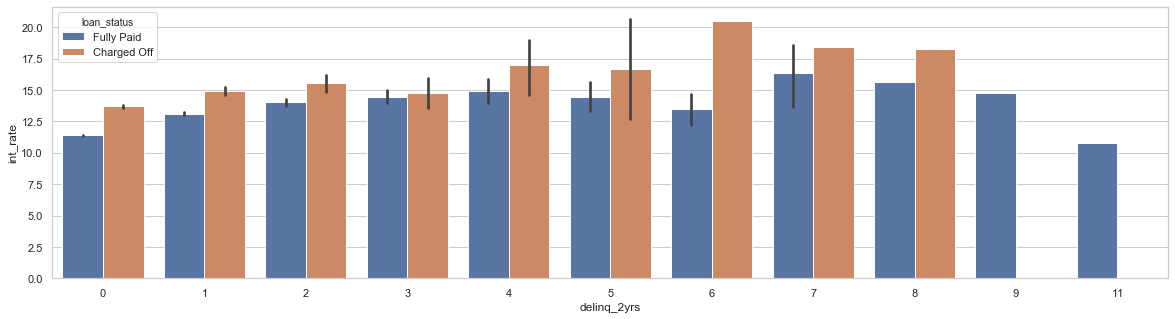

In [127]:
plt.figure(figsize=(20,5))
sns.barplot(x='delinq_2yrs', y='int_rate', hue='loan_status',data=loan_data, estimator=np.mean)
plt.show()

###### Observation:

In genral, intrest rate offered inceases with the number of deliquency of the borrower.

###### loan_amnt Vs loan_status Vs dti_binning

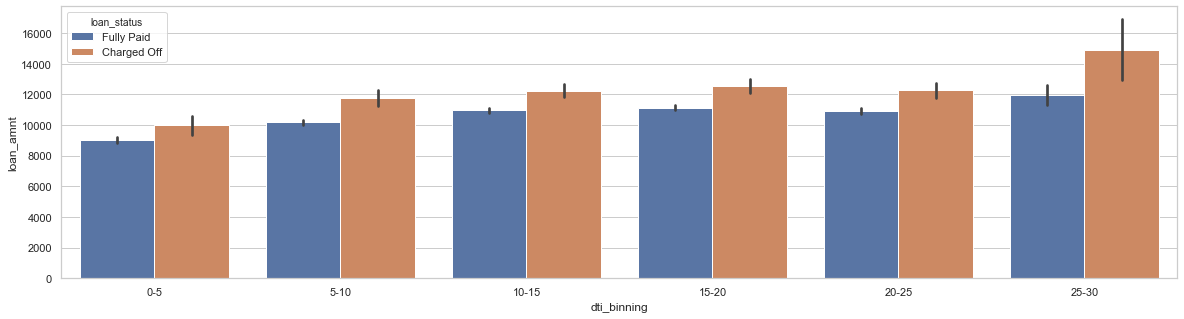

In [135]:
plt.figure(figsize=(20,5))
sns.barplot(x='dti_binning', y='loan_amnt', hue='loan_status',data=loan_data, estimator=np.mean)
plt.show()

###### Observation:
As the dti increases the charged off values increases.

## Correlation heat map of all main factors parameters

In [136]:
loan_data["term"] = loan_data["term"].apply(lambda val: int(val))

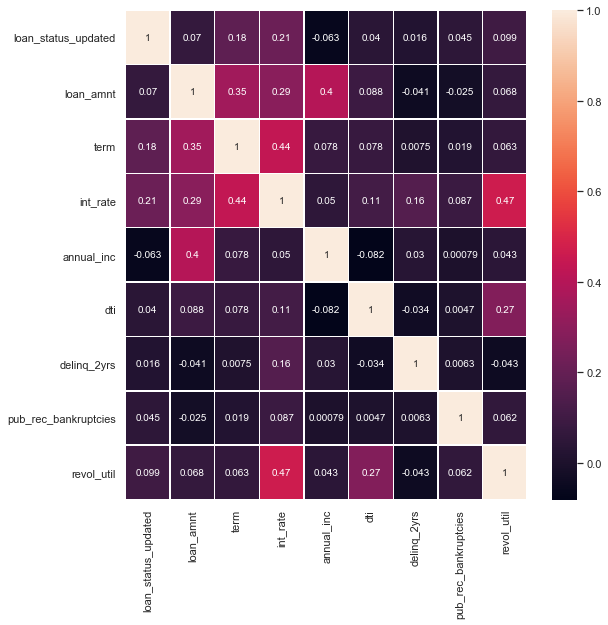

In [137]:
# Heat map to get a feel of how each column is correlated with each other
fig, ax = plt.subplots(figsize=(9,9))

tmp_df = loan_data[
    ["loan_status_updated", "loan_amnt","term","int_rate","annual_inc","dti","delinq_2yrs",
     "pub_rec_bankruptcies","revol_util"]]

loan_corr = tmp_df.corr()
sns.heatmap(loan_corr, 
            xticklabels = loan_corr.columns.values,
            yticklabels = loan_corr.columns.values,
            annot = True,
            linewidths=0.5,
            ax=ax)

# fix for bug that cuts off top/bottom of seaborn
bot, top = plt.ylim()
bot += 0.5
top -= 0.5
plt.ylim(bot, top)
pass

In [138]:
# Correlation of all numerical columns with loan status
loan_data.corr()["loan_status_updated"].sort_values()

annual_inc              -0.063198
income_bin              -0.061745
earliest_cr_line_year    0.015637
delinq_2yrs              0.016251
emp_length               0.019152
issued_year              0.033303
dti                      0.040364
pub_rec_bankruptcies     0.045425
loan_amnt                0.069832
revol_util               0.098985
revol_util_bin           0.099032
ratio_bin                0.115338
ratio                    0.119893
term                     0.182205
interest_rate_buckets    0.213302
int_rate                 0.214354
loan_status_updated      1.000000
acc_now_delinq                NaN
delinq_amnt                   NaN
Name: loan_status_updated, dtype: float64

# Conclusion
Contributing factors are:

1. Grade/Sub Grade (as we move from grade A to G probabilty of deafult increases)
2. Interest rate (positive correlation with probabilty of default)
3. term (positive correlation with probabilty of default)
4. issued year (negative correlation with probabilty of default)
5. loan_amnt (positive correlation with default probability)
6. annual_inc (negative correlation with default probability)
7. delinq_2yr (positive correlation with default probability)
8. dti  (positive correlation with default probability)